In [72]:
import util

In [73]:
import pandas as pd
from PIL import Image
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [74]:
df = pd.read_csv("WorldStrat Dataset.csv", index_col=0)
df

,n,bounds,lowres_date,highres_date,area,cloud_cover,delta,lon,lat,LCCS,SMOD,IPCC Class,LCCS class,SMOD Class
Amnesty POI-10-1-1,1,"[105.84161265950597, 13.147748954631947, 105.8...",2019-01-06,2019-01-27,2.5,0.06,-21,105.848905,13.154895,50,11,Forest,"Tree cover, broadleaved, evergreen, closed to ...",Rural: Very Low Dens
Amnesty POI-10-1-1,2,"[105.84161265950597, 13.147748954631947, 105.8...",2019-02-15,2019-01-27,2.5,0.15,19,105.848905,13.154895,50,11,Forest,"Tree cover, broadleaved, evergreen, closed to ...",Rural: Very Low Dens
Amnesty POI-10-1-1,3,"[105.84161265950597, 13.147748954631947, 105.8...",2019-01-31,2019-01-27,2.5,6.26,4,105.848905,13.154895,50,11,Forest,"Tree cover, broadleaved, evergreen, closed to ...",Rural: Very Low Dens
Amnesty POI-10-1-1,4,"[105.84161265950597, 13.147748954631947, 105.8...",2018-12-17,2019-01-27,2.5,0.73,-41,105.848905,13.154895,50,11,Forest,"Tree cover, broadleaved, evergreen, closed to ...",Rural: Very Low Dens
Amnesty POI-10-1-1,5,"[105.84161265950597, 13.147748954631947, 105.8...",2018-12-02,2019-01-27,2.5,0.11,-56,105.848905,13.154895,50,11,Forest,"Tree cover, broadleaved, evergreen, closed to ...",Rural: Very Low Dens
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UNHCR-BRAs003173,12,"[-41.973930307054175, -12.04047654642226, -41....",2018-09-26,2018-09-23,2.5,5.12,3,-41.966670,-12.033330,120,11,Other,Shrubland,Rural: Very Low Dens
UNHCR-BRAs003173,13,"[-41.973930307054175, -12.04047654642226, -41....",2018-09-26,2018-09-23,2.5,5.12,3,-41.966670,-12.033330,120,11,Other,Shrubland,Rural: Very Low Dens
UNHCR-BRAs003173,14,"[-41.973930307054175, -12.04047654642226, -41....",2018-10-11,2018-09-23,2.5,0.31,18,-41.966670,-12.033330,120,11,Other,Shrubland,Rural: Very Low Dens
UNHCR-BRAs003173,15,"[-41.973930307054175, -12.04047654642226, -41....",2018-10-11,2018-09-23,2.5,0.31,18,-41.966670,-12.033330,120,11,Other,Shrubland,Rural: Very Low Dens


In [75]:
df = df.loc[~df.index.duplicated(keep='first')]
df

,n,bounds,lowres_date,highres_date,area,cloud_cover,delta,lon,lat,LCCS,SMOD,IPCC Class,LCCS class,SMOD Class
Amnesty POI-10-1-1,1,"[105.84161265950597, 13.147748954631947, 105.8...",2019-01-06,2019-01-27,2.5,0.06,-21,105.848905,13.154895,50,11,Forest,"Tree cover, broadleaved, evergreen, closed to ...",Rural: Very Low Dens
Amnesty POI-10-1-2,1,"[105.84161265950597, 13.162040839281076, 105.8...",2019-01-06,2019-01-27,2.5,0.06,-21,105.848905,13.169187,50,11,Forest,"Tree cover, broadleaved, evergreen, closed to ...",Rural: Very Low Dens
Amnesty POI-10-1-3,1,"[105.84161265950597, 13.176332723930203, 105.8...",2019-01-06,2019-01-27,2.5,0.06,-21,105.848905,13.183479,50,11,Forest,"Tree cover, broadleaved, evergreen, closed to ...",Rural: Very Low Dens
Amnesty POI-10-2-1,1,"[105.8561973580532, 13.147748954631947, 105.87...",2019-01-06,2019-01-27,2.5,0.06,-21,105.863490,13.154895,50,11,Forest,"Tree cover, broadleaved, evergreen, closed to ...",Rural: Very Low Dens
Amnesty POI-10-2-2,1,"[105.8561973580532, 13.162040839281076, 105.87...",2019-01-06,2019-01-27,2.5,0.06,-21,105.863490,13.169187,50,11,Forest,"Tree cover, broadleaved, evergreen, closed to ...",Rural: Very Low Dens
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UNHCR-NGAs035354,1,"[13.778820599146073, 11.218193050313346, 13.79...",2017-11-05,2017-11-08,2.5,0.00,-3,13.786060,11.225340,190,11,Settlement,Urban areas,Rural: Very Low Dens
UNHCR-MMRs035425,1,"[93.47666334949932, 20.0770397931716, 93.49178...",2021-04-18,2021-04-18,2.5,0.31,0,93.484222,20.084181,40,11,Agriculture,"Mosaic natural vegetation (tree, shrub, herbac...",Rural: Very Low Dens
UNHCR-CMRs004018,1,"[14.592949197448435, 6.726291317447426, 14.607...",2019-12-05,2019-12-10,2.5,0.00,-5,14.600100,6.733440,62,11,Forest,"Tree cover, broadleaved, deciduous, open (15‐40%)",Rural: Very Low Dens
UNHCR-CMRs004005,1,"[14.942548959144071, 6.742551322195224, 14.956...",2018-12-10,2018-10-20,2.5,0.00,51,14.949700,6.749700,190,23,Settlement,Urban areas,Urban: Dense


In [76]:
print(len(df))
df['SMOD Class'].value_counts()

3928


Rural: Very Low Dens    2207
Urban: Centre            582
Rural: Low Dens          323
Urban: Suburban          265
Urban: Dense             200
Rural: cluster           164
Urban: Semi-dense         98
Water                     89
Name: SMOD Class, dtype: int64

<Axes: >

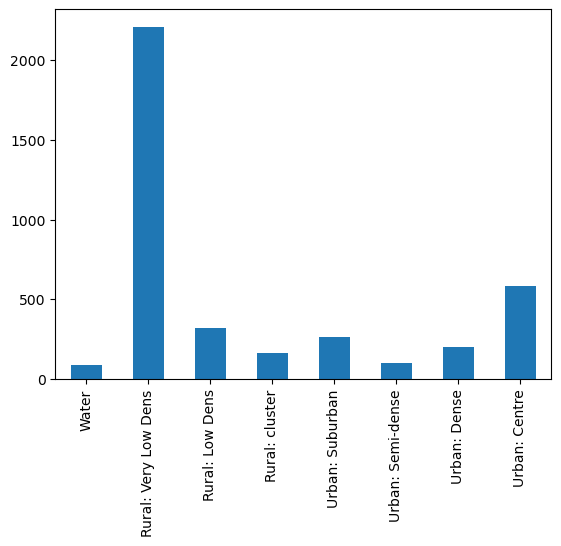

In [77]:
df["SMOD Class"].value_counts().reindex(['Water', 'Rural: Very Low Dens', 'Rural: Low Dens', 'Rural: cluster', 'Urban: Suburban', 
                                            'Urban: Semi-dense', 'Urban: Dense', 'Urban: Centre']).plot(kind='bar')

In [ ]:
labels = util.get_labels_and_split()
labels

In [135]:
aug_labels = util.get_labels_augmented()

<Axes: >

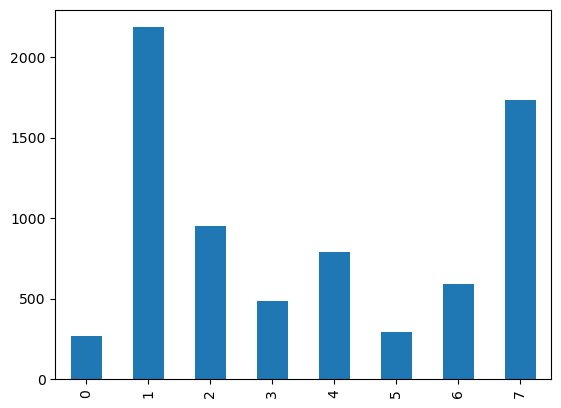

In [136]:
aug_labels["SMOD Class"].value_counts().reindex([0,1,2,3,4,5,6,7]).plot(kind='bar')

In [80]:
counts = df['SMOD Class']
counts

Amnesty POI-10-1-1    Rural: Very Low Dens
Amnesty POI-10-1-2    Rural: Very Low Dens
Amnesty POI-10-1-3    Rural: Very Low Dens
Amnesty POI-10-2-1    Rural: Very Low Dens
Amnesty POI-10-2-2    Rural: Very Low Dens
                              ...         
UNHCR-NGAs035354      Rural: Very Low Dens
UNHCR-MMRs035425      Rural: Very Low Dens
UNHCR-CMRs004018      Rural: Very Low Dens
UNHCR-CMRs004005              Urban: Dense
UNHCR-BRAs003173      Rural: Very Low Dens
Name: SMOD Class, Length: 3928, dtype: object

In [81]:
# util.save_high_res()

In [82]:
high_res = np.load("high_res.npy")

In [83]:
y, train, val, test = util.get_labels_and_split()
y_train, y_val, y_test = y[train], y[val], y[test]

In [84]:
high_res_mean = high_res.mean(axis=1)
high_res_mean

array([[[ 6.366,  8.79 ,  6.202],
        [ 6.33 ,  8.75 ,  6.174],
        [ 6.218,  8.638,  6.038],
        ...,
        [ 5.15 ,  7.266,  5.012],
        [ 5.242,  7.386,  5.128],
        [ 5.328,  7.498,  5.22 ]],

       [[ 3.944,  6.088,  4.174],
        [ 3.938,  6.102,  4.15 ],
        [ 3.936,  6.048,  4.104],
        ...,
        [ 4.028,  6.106,  3.96 ],
        [ 4.12 ,  6.218,  4.028],
        [ 4.132,  6.158,  4.026]],

       [[ 3.65 ,  5.724,  3.79 ],
        [ 3.618,  5.698,  3.756],
        [ 3.672,  5.798,  3.854],
        ...,
        [ 4.156,  6.206,  4.174],
        [ 4.148,  6.182,  4.202],
        [ 4.154,  6.23 ,  4.188]],

       ...,

       [[90.366, 89.004, 95.476],
        [94.402, 93.552, 95.346],
        [98.306, 97.858, 95.002],
        ...,
        [95.928, 98.064, 92.54 ],
        [95.76 , 97.898, 92.348],
        [95.342, 97.486, 91.984]],

       [[12.504, 12.318, 10.578],
        [12.458, 12.254, 10.506],
        [12.878, 12.62 , 10.834],
        .

In [85]:
high_res_mean_real = high_res_mean.mean(axis=1)
high_res_mean_real

array([[ 5.26882 ,  7.484776,  5.146744],
       [ 3.93088 ,  5.969892,  3.893532],
       [ 3.7275  ,  5.772296,  3.919716],
       ...,
       [87.702068, 88.82524 , 83.34076 ],
       [11.947784, 12.161552, 10.592608],
       [18.518568, 15.454892, 11.928908]])

In [86]:
high_res.shape

(3889, 500, 500, 3)

In [87]:
a = high_res.mean(axis=0)
a.shape

(500, 500, 3)

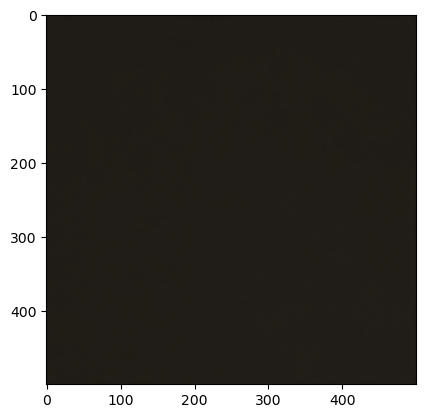

In [88]:
a = a.astype(int)
plt.imshow(a)


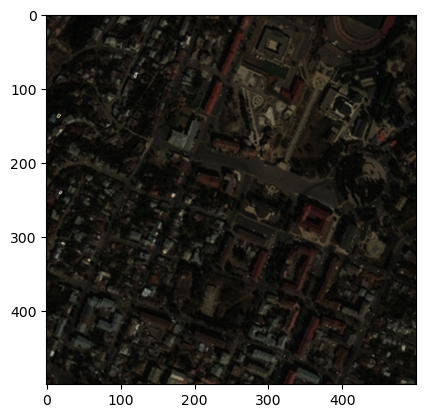

In [89]:
plt.imshow(high_res[100])

In [90]:
low_res = np.load('low_res.npy')

In [91]:
low_res.shape

(3889, 147, 147, 3)

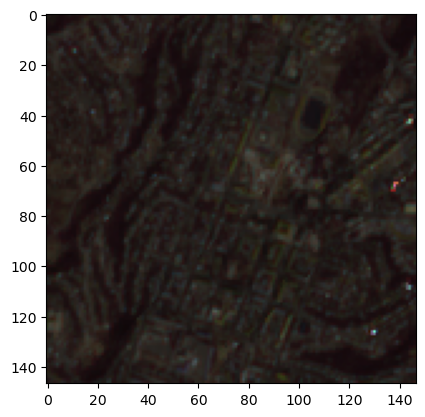

In [92]:
plt.imshow(low_res[100])

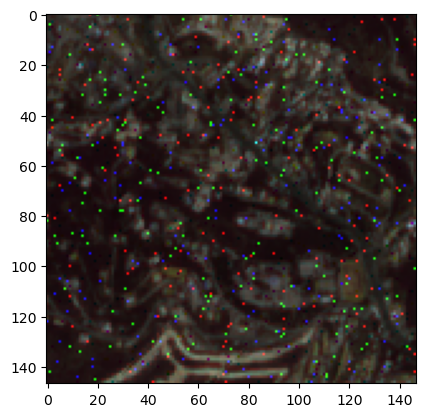

In [93]:
from skimage.util import random_noise
img = low_res[800]
noise_img = random_noise(img, mode='s&p', amount=0.015)
noise_img = np.array(255*noise_img, dtype='uint8')
plt.imshow(noise_img)

In [160]:
# util.save_low_res_augmented()

7301it [00:24, 298.23it/s]


In [161]:
low_res_aug = np.load('low_res_aug.npy')

In [162]:
low_res_aug.shape

(7301, 147, 147, 3)

In [198]:
len_1 = len(util.get_labels())
aug_labels = util.get_labels_augmented()
len_2 = int((len(aug_labels)-len_1) / 2)
print(len_1, len_2)
print(len_1+len_2+len_2)

3889 1706
7301


In [219]:
y, train, val, test = util.get_labels_and_split()

In [240]:
y, train, val, test = util.get_labels_and_split_augmented()
print(len(y[train]), len(y[val]), len(y[test]))

5867 730 704


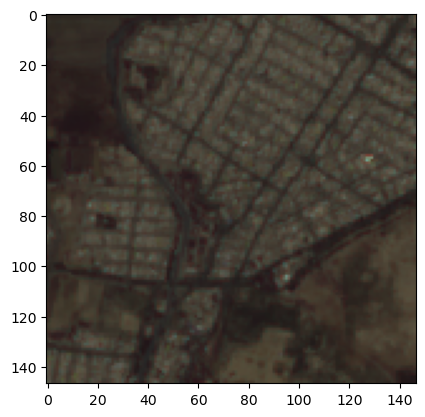

In [217]:
plt.imshow(low_res_aug[5900-len_2-len_2])

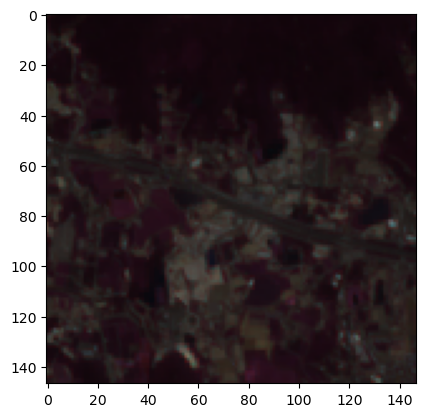

In [230]:
plt.imshow(low_res_aug[6500-len_2])

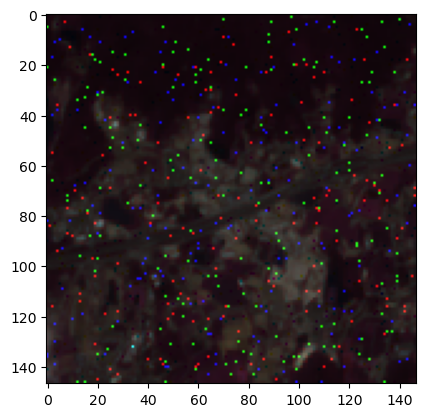

In [207]:
plt.imshow(low_res_aug[6500])

In [98]:
aug_labels = util.get_labels_augmented()
aug_labels['SMOD Class'].value_counts()

1    2183
7    1734
2     954
4     789
6     591
3     489
5     294
0     267
Name: SMOD Class, dtype: int64

<Axes: >

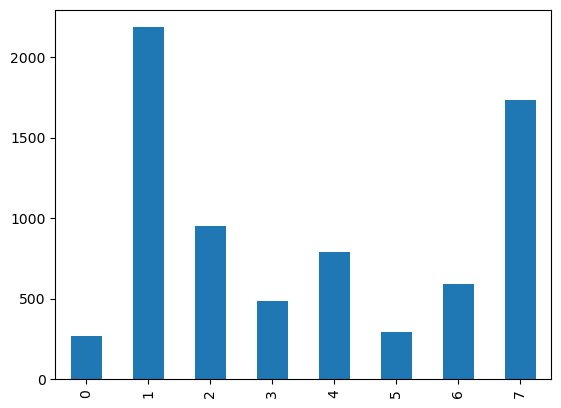

In [239]:
aug_labels['SMOD Class'].value_counts().reindex([0,1,2,3,4,5,6,7]).plot(kind='bar')

In [140]:
from sklearn.decomposition import PCA

y, train, val, test = util.get_labels_and_split_augmented()

y_train, y_val, y_test = y[train], y[val], y[test]

flat = low_res_aug.reshape((low_res_aug.shape[0], -1)).astype('uint8')

X_train = flat[train]
X_val = flat[val]
X_test = flat[test]

# pca = PCA(n_components=3)

# pca.fit(X_train)

In [101]:
# pca.explained_variance_ratio_

In [143]:
pca = PCA(n_components=10)
pca.fit(X_val)
pca.explained_variance_ratio_

array([0.71859158, 0.01818227, 0.0126219 , 0.00979153, 0.00859631,
       0.00790515, 0.00686053, 0.00639944, 0.00580976, 0.00521568])

In [144]:
X_val = pca.transform(X_val)

In [66]:
X_val.shape

(730, 3)

In [145]:
X_test = pca.transform(X_test)

In [146]:
X_train = pca.transform(X_train)

In [41]:
print(len(X_train), len(X_val), len(X_test), len(low_res_aug))

5867 730 704 7301


In [69]:
X_train, X_test

(array([[-6914.6503199 ,   -83.78109458,   225.87958426],
        [-7207.07472793,  -192.72083369,  -292.8790801 ],
        [-5657.12563369,   609.41479803,   126.55813269],
        ...,
        [ 1482.92149521,   -22.38762788,  -288.57048598],
        [ 1398.03574219,  -921.95376509,    33.06633564],
        [ 4484.93074594,   285.0590665 ,   445.43368717]]),
 array([[-6795.07927634,  -137.52429317,   200.05194765],
        [-5971.33909571,  -632.7164241 ,   154.20116745],
        [ 1947.5497454 , -1317.82771344,  -445.65746335],
        ...,
        [-3293.2424827 ,  -185.09037285,   155.28375119],
        [ 1255.28717112,   -39.17115498,   256.64539742],
        [ 6260.52434573,   183.25891604,  -550.61401285]]))

In [149]:
from sklearn.ensemble import GradientBoostingClassifier
rf = GradientBoostingClassifier(n_estimators = 100, max_depth = 3, learning_rate=0.1, random_state=0)
rf.fit(X_train, y_train)

GradientBoostingClassifier(random_state=0)

In [151]:
print('test:', rf.score(X_test, y_test), 'val:', rf.score(X_val, y_val), 'train:', rf.score(X_train, y_train))

test: 0.39204545454545453 val: 0.4095890410958904 train: 0.6132606101926027


In [70]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(multi_class='multinomial', max_iter = 10000)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=10000, multi_class='multinomial')

In [71]:
print('train', lr.score(X_train, y_train))
print('val', lr.score(X_val, y_val))
print('test', lr.score(X_test, y_test))

train 0.23760013635588886
val 0.23835616438356164
test 0.2556818181818182


In [105]:
print(len(y_val[y_val==1]), len(y_val), len(y_val[y_val==1]) / len(y_val))

214 730 0.29315068493150687


In [106]:
print(len(y_train), len(y_val), len(y_test))

5867 730 704


In [129]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
_, counts_train = np.unique(y_train, return_counts=True)
_, counts_val = np.unique(y_val, return_counts=True)
_, counts_test = np.unique(y_test, return_counts=True)

print(counts_train, counts_val, counts_test)

[ 204 1736  771  405  624  240  474 1413] [ 21 214  99  33  90  30  63 180] [ 42 233  84  51  75  24  54 141]


In [130]:
from imblearn.under_sampling import RandomUnderSampler
freqs = {1:500, 2:500, 4:500, 7:500}
rus = RandomUnderSampler(random_state=0, sampling_strategy=freqs, replacement=True)
X_under, y_under = rus.fit_resample(X_train, y_train)
_, counts_under = np.unique(y_under, return_counts=True)
print(counts_under)

[204 500 500 405 500 240 474 500]


In [131]:
X_train_resample, y_train_resample = ros.fit_resample(X_under, y_under)
unique, counts = np.unique(y_train_resample, return_counts=True)
print(counts)

[500 500 500 500 500 500 500 500]


In [132]:
X_val_resample, y_val_resample = ros.fit_resample(X_val, y_val)
X_test_resample, y_test_resample = ros.fit_resample(X_test, y_test)


In [134]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(multi_class='multinomial', max_iter = 500, verbose=1)
print(len(X_train_resample), len(X_val_resample), len(X_test_resample))
lr.fit(X_train_resample, y_train_resample)
print('train', lr.score(X_train_resample, y_train_resample))
print('val', lr.score(X_val_resample, y_val_resample))
print('test', lr.score(X_test_resample, y_test_resample))

4000 1712 1864


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
c:\Users\abhiv\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  6.0min finished


train 1.0
val 0.14953271028037382
test 0.15987124463519314


In [153]:
import tensorflow as tf

y, train, val, test = util.get_labels_and_split()

y_train, y_val, y_test = y[train], y[val], y[test]

y_train = tf.one_hot(y_train, depth=8)
y_val   = tf.one_hot(y_val,   depth=8)
y_test  = tf.one_hot(y_test,  depth=8)


# Make this file once with util.save_high_res()
high_res = np.load('high_res.npy')

# high_res.reshape(high_res.shape[0], -1)

X_train = high_res[train]
X_val = high_res[val]
X_test = high_res[test]

resnet = tf.keras.models.load_model('hires_image_classifier.h5')
resnet.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet152 (Functional)      (None, 16, 16, 2048)      58370944  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 256)               524544    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 8)                 2056      
                                                                 
Total params: 58,897,544
Trainable params: 526,600
Non-trainable params: 58,370,944
______________________________________

In [154]:
test_loss, test_acc = resnet.evaluate(X_test, y_test, verbose=2)

13/13 - 184s - loss: 1.0659 - accuracy: 0.6538 - 184s/epoch - 14s/step


In [155]:
test_acc

0.6538461446762085

In [ ]:
X_train = high_res_mean_real[train]
X_val = high_res_mean_real[val]
X_test = high_res_mean_real[test]

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(multi_class='multinomial', max_iter=5000)

lr.fit(X_train, y_train)

LogisticRegression(max_iter=5000, multi_class='multinomial')

In [ ]:
predictions = lr.predict(X_val)

In [ ]:
(predictions == y_val).mean()

0.5440414507772021

In [ ]:
(1 == y_val).mean()

0.5544041450777202

In [ ]:
labels = util.get_labels()

In [ ]:
labels.loc['ASMSpotter-1-1-1']

KeyError: 'ASMSpotter-1-1-1'

In [ ]:
import tqdm
import tifffile
import pandas as pd
import numpy as np

In [ ]:
labels = util.get_labels()
labels = labels.drop("ASMSpotter-1-1-1")
low_res = []
for index, row in labels.iterrows():
    image = tifffile.imread(f"{row['split']}_split/{index}/{index}-1-L2A_data.tiff")
    arr = np.array([image[:, :, 4], image[:, :, 3], image[:, :, 2]])
    img = (np.transpose(arr, (1,2,0)) * 256).astype('uint8')
    low_res.append(img)

KeyboardInterrupt: 